<a href="https://colab.research.google.com/github/KAVYANSHTYAGI/Graph_Neural_Networks/blob/main/gnn_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.4 MB/s eta 0:00:00


In [ ]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.nn import Linear
from torch_geometric.nn import GCNConv


In [ ]:
dataset = KarateClub()
data = dataset[0]


In [ ]:
node_features_df = pd.DataFrame(data.x.numpy(), columns=[f'feature_{i}' for i in range(data.x.shape[1])])
node_features_df['node'] = node_features_df.index
node_features_df.set_index('node', inplace=True)


In [ ]:
edge_index_df = pd.DataFrame(data.edge_index.numpy().T, columns=['source', 'target'])


In [ ]:
labels_df = pd.DataFrame(data.y.numpy(), columns=['label'])
labels_df['node'] = labels_df.index
labels_df.set_index('node', inplace=True)


In [ ]:
num_nodes = data.num_nodes
num_edges = data.edge_index.shape[1]

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 34
Number of edges: 156


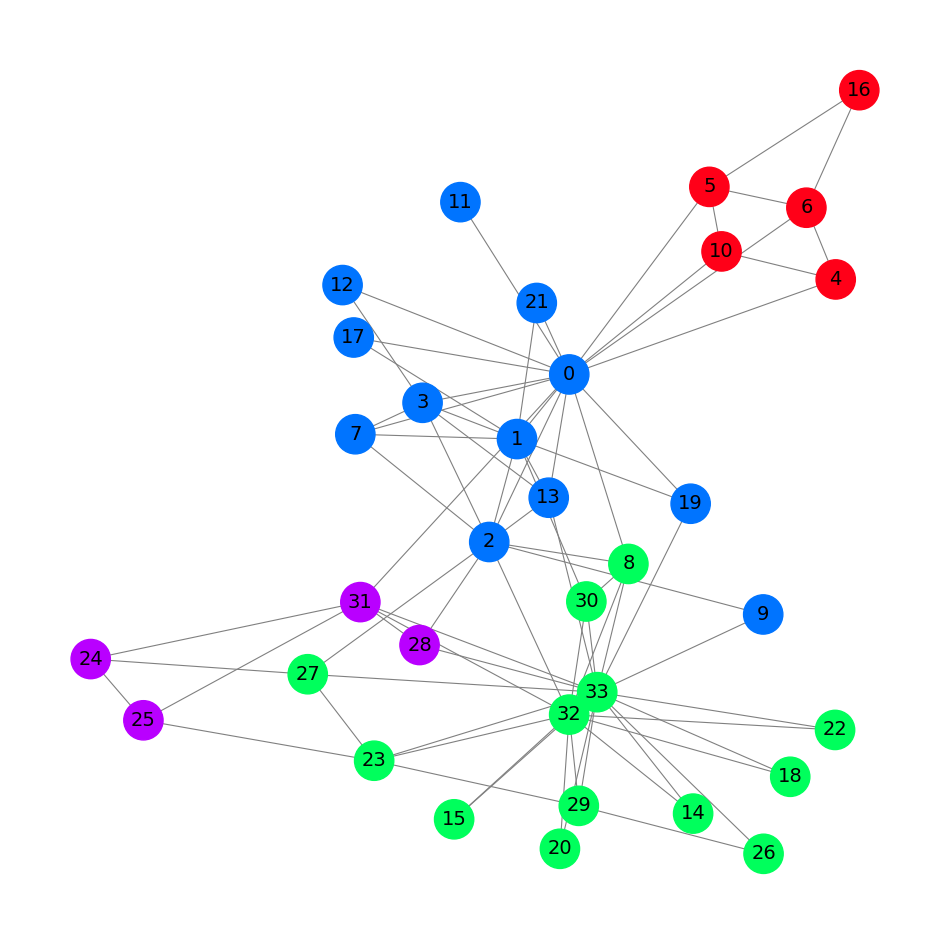

In [ ]:
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12, 12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 with_labels=True,
                 node_size=800,
                 node_color=data.y,
                 cmap="hsv",
                 vmin=-2,
                 vmax=3,
                 width=0.8,
                 edge_color="grey",
                 font_size=14)
plt.show()


In [ ]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, num_countries)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z


In [ ]:
num_countries = 4
model = GCN()
print(model)


GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [ ]:
# Define loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

# Accuracy function
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

In [ ]:
# Training loop
embeddings = []
losses = []
accuracies = []
outputs = []

for epoch in range(200):
    optimizer.zero_grad()
    h, z = model(data.x, data.edge_index)
    loss = criterion(z, data.y)
    acc = accuracy(z.argmax(dim=1), data.y)

    loss.backward()
    optimizer.step()

    embeddings.append(h)
    losses.append(loss.item())
    accuracies.append(acc.item())
    outputs.append(z.argmax(dim=1))

    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc:.2f}')

Epoch   0 | Loss: 1.43 | Acc: 0.12
Epoch  10 | Loss: 1.21 | Acc: 0.68
Epoch  20 | Loss: 0.93 | Acc: 0.74
Epoch  30 | Loss: 0.66 | Acc: 0.74
Epoch  40 | Loss: 0.46 | Acc: 0.88
Epoch  50 | Loss: 0.33 | Acc: 0.88
Epoch  60 | Loss: 0.24 | Acc: 0.88
Epoch  70 | Loss: 0.18 | Acc: 0.97
Epoch  80 | Loss: 0.14 | Acc: 1.00
Epoch  90 | Loss: 0.11 | Acc: 1.00
Epoch 100 | Loss: 0.09 | Acc: 1.00
Epoch 110 | Loss: 0.08 | Acc: 1.00
Epoch 120 | Loss: 0.06 | Acc: 1.00
Epoch 130 | Loss: 0.05 | Acc: 1.00
Epoch 140 | Loss: 0.05 | Acc: 1.00
Epoch 150 | Loss: 0.04 | Acc: 1.00
Epoch 160 | Loss: 0.03 | Acc: 1.00
Epoch 170 | Loss: 0.03 | Acc: 1.00
Epoch 180 | Loss: 0.03 | Acc: 1.00
Epoch 190 | Loss: 0.02 | Acc: 1.00


GCN ON MNIST DATASET

In [1]:
pip install torch torchvision torch-geometric matplotlib networkx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch_geometric.data import Data, DataLoader
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Convert to NumPy arrays
X_train = mnist_train.data.numpy()  # Shape: (60000, 28, 28)
y_train = mnist_train.targets.numpy()  # Shape: (60000,)

print(f"MNIST Dataset Shape: {X_train.shape}, Labels Shape: {y_train.shape}")


100%|██████████| 9.91M/9.91M [00:00<00:00, 144MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 13.8MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 56.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.03MB/s]


MNIST Dataset Shape: (60000, 28, 28), Labels Shape: (60000,)


In [3]:
from torch_geometric.utils import dense_to_sparse

def image_to_graph(image, label):
    """Convert an MNIST image to a graph"""
    h, w = image.shape  # (28,28)
    num_nodes = h * w  # 784 pixels as nodes

    # Reshape image into a 1D array
    node_features = image.reshape(-1, 1) / 255.0  # Normalize pixel values (0-1)

    # Create adjacency matrix (fully connected to neighbors)
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    for i in range(h):
        for j in range(w):
            idx = i * w + j  # Current pixel index
            if i > 0: adjacency_matrix[idx, (i - 1) * w + j] = 1  # Top
            if i < h - 1: adjacency_matrix[idx, (i + 1) * w + j] = 1  # Bottom
            if j > 0: adjacency_matrix[idx, i * w + (j - 1)] = 1  # Left
            if j < w - 1: adjacency_matrix[idx, i * w + (j + 1)] = 1  # Right

    # Convert adjacency matrix to edge index (PyG format)
    edge_index = dense_to_sparse(torch.tensor(adjacency_matrix))[0]

    # Convert to PyTorch Geometric Data object
    graph_data = Data(x=torch.tensor(node_features, dtype=torch.float),
                      edge_index=edge_index.long(),
                      y=torch.tensor(label, dtype=torch.long))

    return graph_data

# Convert first 1000 images into graphs
graph_dataset = [image_to_graph(X_train[i], y_train[i]) for i in range(1000)]

# Create a DataLoader for batch training
train_loader = DataLoader(graph_dataset, batch_size=32, shuffle=True)

print(f"Converted {len(graph_dataset)} images to graphs.")


Converted 1000 images to graphs.


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [6]:
from torch_geometric.nn import GCNConv, global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 32)
        self.fc = Linear(32, 10)  # Output 10 classes

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, batch)  # ✅ Corrected: Use imported `global_mean_pool`
        x = self.fc(x)
        return x


model = GCN()
print(model)


GCN(
  (conv1): GCNConv(1, 16)
  (conv2): GCNConv(16, 32)
  (fc): Linear(in_features=32, out_features=10, bias=True)
)


In [8]:
# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    total_loss = 0
    correct = 0
    total = 0

    for data in train_loader:  # `data` is a batch of graphs
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)  # Pass batch indices
        loss = criterion(out, data.y)  # ✅ Now `out` has shape (batch_size, 10), and `data.y` has shape (batch_size,)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pred = out.argmax(dim=1)  # Fix shape for batch predictions
        correct += (pred == data.y).sum().item()
        total += data.y.size(0)  # Count total processed images

    acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}, Accuracy: {acc:.4f}")





Epoch 1/1000, Loss: 65.2570, Accuracy: 0.2470
Epoch 2/1000, Loss: 65.1945, Accuracy: 0.2380
Epoch 3/1000, Loss: 65.3369, Accuracy: 0.2350
Epoch 4/1000, Loss: 65.1961, Accuracy: 0.2370
Epoch 5/1000, Loss: 65.1670, Accuracy: 0.2390
Epoch 6/1000, Loss: 65.2923, Accuracy: 0.2310
Epoch 7/1000, Loss: 64.8879, Accuracy: 0.2440
Epoch 8/1000, Loss: 64.8802, Accuracy: 0.2330
Epoch 9/1000, Loss: 65.3044, Accuracy: 0.2350
Epoch 10/1000, Loss: 64.7866, Accuracy: 0.2330
Epoch 11/1000, Loss: 64.6604, Accuracy: 0.2450
Epoch 12/1000, Loss: 65.2414, Accuracy: 0.2320
Epoch 13/1000, Loss: 64.9246, Accuracy: 0.2370
Epoch 14/1000, Loss: 65.0054, Accuracy: 0.2350
Epoch 15/1000, Loss: 64.6742, Accuracy: 0.2370
Epoch 16/1000, Loss: 65.1257, Accuracy: 0.2390
Epoch 17/1000, Loss: 64.9170, Accuracy: 0.2400
Epoch 18/1000, Loss: 65.1863, Accuracy: 0.2420
Epoch 19/1000, Loss: 64.8088, Accuracy: 0.2360
Epoch 20/1000, Loss: 65.1966, Accuracy: 0.2380
Epoch 21/1000, Loss: 65.1128, Accuracy: 0.2450
Epoch 22/1000, Loss: 6

In [10]:

test_graph = image_to_graph(X_train[1001], y_train[1001])  # Convert one test image to graph
test_graph.batch = torch.zeros(test_graph.x.shape[0], dtype=torch.long)  # Create batch index

# Model inference
model.eval()
with torch.no_grad():
    output = model(test_graph.x, test_graph.edge_index, test_graph.batch)  # Pass batch
    predicted_label = output.argmax(dim=1).item()

print(f"True Label: {test_graph.y.item()}, Predicted Label: {predicted_label}")


True Label: 7, Predicted Label: 2
